In [ ]:
import pandas as pd
import numpy as np
import difflib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import warnings
warnings.filterwarnings('ignore')

#Data Collection and Pre-Processing

In [ ]:
movies_data=pd.read_csv('/content/movies (1).csv')

In [ ]:
movies_data.head(2)

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,director
0,0,237000000,Action Adventure Fantasy Science Fiction,http://www.avatarmovie.com/,19995,culture clash future space war space colony so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Sam Worthington Zoe Saldana Sigourney Weaver S...,"[{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...",James Cameron
1,1,300000000,Adventure Fantasy Action,http://disney.go.com/disneypictures/pirates/,285,ocean drug abuse exotic island east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Johnny Depp Orlando Bloom Keira Knightley Stel...,"[{'name': 'Dariusz Wolski', 'gender': 2, 'depa...",Gore Verbinski


In [ ]:
  movies_data.keys()

Index(['index', 'budget', 'genres', 'homepage', 'id', 'keywords',
       'original_language', 'original_title', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'vote_average', 'vote_count', 'cast', 'crew', 'director'],
      dtype='object')

In [ ]:
movies_data.shape

(4803, 24)

In [ ]:
movies_data.isnull().sum()

index                      0
budget                     0
genres                    28
homepage                3091
id                         0
keywords                 412
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
cast                      43
crew                       0
director                  30
dtype: int64

# data Visulization

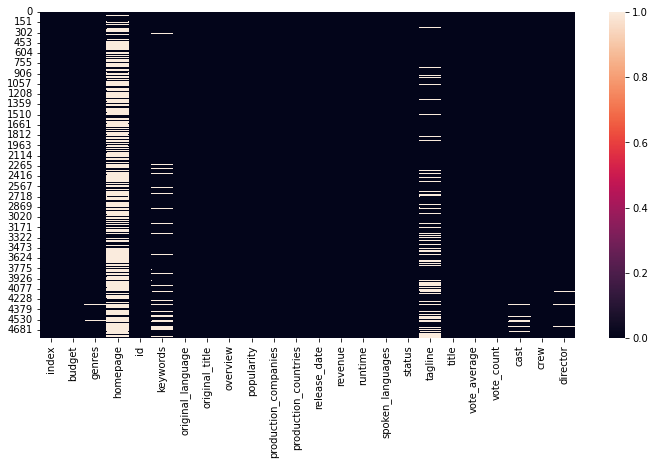

In [ ]:
# cheacking missing values.

plt.figure(figsize=(12,6))
sns.heatmap(movies_data.isnull())
plt.show()

In [ ]:
movies_data['genres'].value_counts()

Drama                                     370
Comedy                                    282
Drama Romance                             164
Comedy Romance                            144
Comedy Drama                              142
                                         ... 
Adventure Comedy Crime Science Fiction      1
Action Comedy Family Adventure              1
Drama Adventure Western                     1
Adventure Fantasy Action Romance            1
Comedy Drama Romance TV Movie               1
Name: genres, Length: 1168, dtype: int64

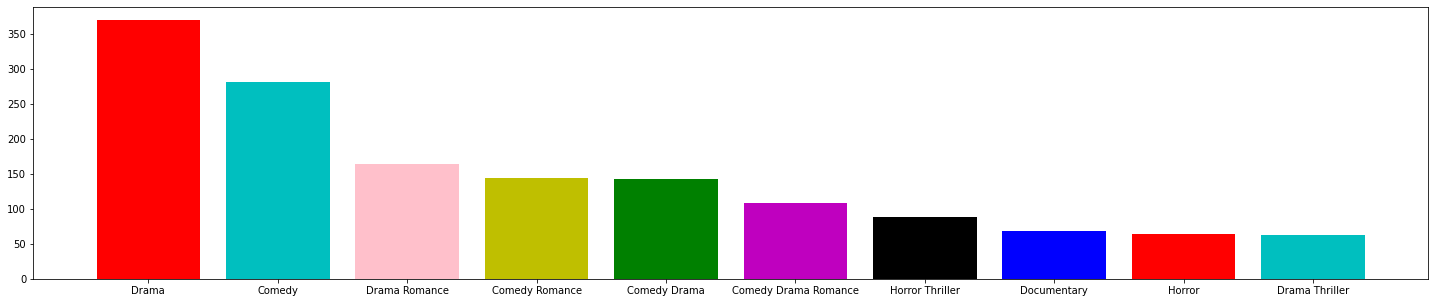

In [ ]:
plt.figure(figsize=(25,5))
plt.bar(list(movies_data['genres'].value_counts()[0:10].keys()),list(movies_data['genres'].value_counts()[0:10]), color = ['r','c','pink','y','g','m','k','b'] )
plt.show()

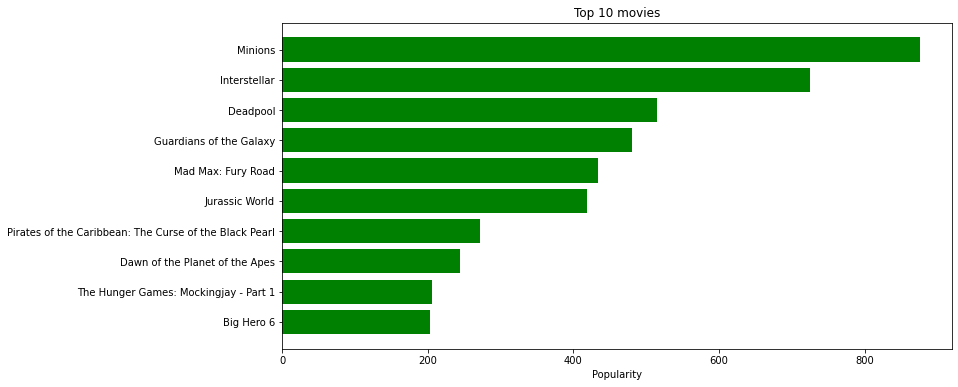

In [ ]:
# ploting the graph for top 10 most popular movies according to their popularity score .
def plot():
    popularity = movies_data.sort_values("popularity", ascending=False)
    plt.figure(figsize=(12, 6))
    plt.barh(popularity["title"].head(10), popularity["popularity"].head(10), align="center", color='green')
    plt.gca().invert_yaxis()
    plt.title("Top 10 movies")
    plt.xlabel("Popularity")
    plt.show()
    
plot()

    



In [ ]:
movies_data['vote_average'].value_counts()

6.5    216
6.0    216
6.7    213
6.3    207
6.1    201
      ... 
2.7      1
0.5      1
2.2      1
1.9      1
2.4      1
Name: vote_average, Length: 71, dtype: int64

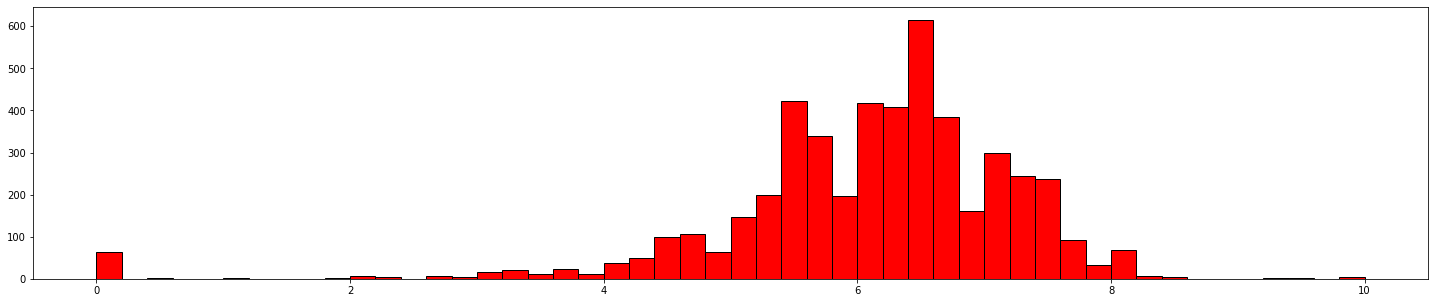

In [ ]:
plt.figure(figsize=(25,5))
plt.hist(movies_data['vote_average'],color='R',edgecolor='Black',bins=50)
plt.show()

In [ ]:
# selecting the features for recommendation of movies.
selected_features = ['genres','keywords','tagline','cast','director']
print(selected_features)

['genres', 'keywords', 'tagline', 'cast', 'director']


In [ ]:
# replacing the null valuess with null string
for feature in selected_features:
  movies_data[feature] = movies_data[feature].fillna('')

In [ ]:
combined_features = movies_data['genres']+' '+movies_data['keywords']+' '+movies_data['tagline']+' '+movies_data['cast']+' '+movies_data['director']

In [ ]:
combined_features.shape

(4803,)

# feature_extraction

In [ ]:
# converting the text data to feature vectors
feature_extraction = TfidfVectorizer()


In [ ]:
feature_vectors=feature_extraction.fit_transform((combined_features).apply(lambda x: np.str_(x)))


In [ ]:
print(feature_vectors)

  (0, 2432)	0.17272411194153
  (0, 7755)	0.1128035714854756
  (0, 13024)	0.1942362060108871
  (0, 10229)	0.16058685400095302
  (0, 8756)	0.22709015857011816
  (0, 14608)	0.15150672398763912
  (0, 16668)	0.19843263965100372
  (0, 14064)	0.20596090415084142
  (0, 13319)	0.2177470539412484
  (0, 17290)	0.20197912553916567
  (0, 17007)	0.23643326319898797
  (0, 13349)	0.15021264094167086
  (0, 11503)	0.27211310056983656
  (0, 11192)	0.09049319826481456
  (0, 16998)	0.1282126322850579
  (0, 15261)	0.07095833561276566
  (0, 4945)	0.24025852494110758
  (0, 14271)	0.21392179219912877
  (0, 3225)	0.24960162956997736
  (0, 16587)	0.12549432354918996
  (0, 14378)	0.33962752210959823
  (0, 5836)	0.1646750903586285
  (0, 3065)	0.22208377802661425
  (0, 3678)	0.21392179219912877
  (0, 5437)	0.1036413987316636
  :	:
  (4801, 17266)	0.2886098184932947
  (4801, 4835)	0.24713765026963996
  (4801, 403)	0.17727585190343226
  (4801, 6935)	0.2886098184932947
  (4801, 11663)	0.21557500762727902
  (4801, 1672

##Cosine Similarity

In [ ]:
# getting the similarity scores using cosine similarity
similarity = cosine_similarity(feature_vectors)

In [ ]:
print(similarity.shape)

(4803, 4803)


In [ ]:
## creating a user defind function for movie recomandation.
movie_name = input(' Enter your favourite movie name : ')


# creating a list with all the movie names given in the data.
list_of_titles = movies_data['title'].tolist()


# finding the close match for the movie name given by the user with the help of difflib function.

finds_close_match = difflib.get_close_matches(movie_name, list_of_titles)


close_match = finds_close_match[0]

# find the index of the movie with title of movie.

index_of_movie = movies_data[movies_data.title == close_match]['index'].values[0]


similarity_score = list(enumerate(similarity[index_of_movie]))

# sorting the movies based on their similarity score.

sorted_similar_movies = sorted(similarity_score, key = lambda x:x[1], reverse = True) 

print('Movies suggested for you : \n')

i = 1

for movie in sorted_similar_movies:
  index = movie[0]
  title_from_index = movies_data[movies_data.index==index]['title'].values[0]
  if (i<10):
    print(i, '.',title_from_index)
    i+=1

 Enter your favourite movie name : Avengers
Movies suggested for you : 

1 . The Avengers
2 . Avengers: Age of Ultron
3 . Captain America: The Winter Soldier
4 . Captain America: Civil War
5 . Iron Man 2
6 . Thor: The Dark World
7 . X-Men
8 . The Incredible Hulk
9 . X-Men: Apocalypse
